<a href="https://colab.research.google.com/github/tsyncIO/ARCore-Android/blob/master/Speech_to_Text_Transcribe_YouTube_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install wget
 !pip install easyocr
 !pip install deepspeech-gpu==0.8.2
 !pip install pafy
 !pip install youtube-dl

In [ ]:
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.8.2/deepspeech-0.8.2-models.pbmm
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.8.2/deepspeech-0.8.2-models.scorer

In [6]:
!pip uninstall opencv-python-headless==4.5.5.62 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [7]:
from deepspeech import Model
import numpy as np
import os
import wave
import easyocr
import pafy
from IPython.display import Audio, Image
from IPython.display import YouTubeVideo




In [8]:
model_file_path = 'deepspeech-0.8.2-models.pbmm'
Im_file_path = 'deepspeech-0.8.2-models.scorer'

beam_width = 500
Im_alpha = 0.93
Im_beta = 1.18

model = Model(model_file_path)
model.enableExternalScorer(Im_file_path)







In [ ]:
model.setScorerAlphaBeta(Im_alpha, Im_beta)
model.setBeamWidth(beam_width)

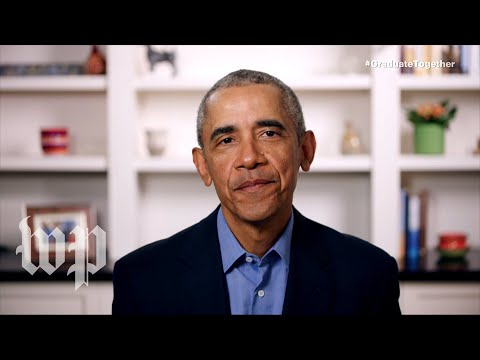

In [11]:
YOUTUBE_ID = 'h5gNSHcoVmQ'
YouTubeVideo(YOUTUBE_ID)




In [16]:
URL = 'https://www.youtube.com/watch\?v\=' + YOUTUBE_ID

In [17]:
URL

'https://www.youtube.com/watch\\?v\\=h5gNSHcoVmQ'

In [18]:
URL2 = 'https://www.youtube.com/watch?v=' + YOUTUBE_ID

In [19]:
URL2

'https://www.youtube.com/watch?v=h5gNSHcoVmQ'

In [20]:
!youtube-dl --extract-audio --audio-format wav --output "obama-speech.%(ext)s" $URL

[youtube] h5gNSHcoVmQ: Downloading webpage
[download] Destination: obama-speech.webm
[download] 100% of 2.28MiB in 00:52
[ffmpeg] Destination: obama-speech.wav
Deleting original file obama-speech.webm (pass -k to keep)


In [21]:
!ffmpeg -i obama-speech.wav -vn -ar 16000 -ac 1 obama-speech_ds.wav

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [23]:
Audio('obama-speech_ds.wav')

In [24]:
stream = model.createStream()

In [25]:
stream

In [27]:
def read_wav_file(filename):
  with wave.open(filename, 'rb') as w:
    rate = w.getframerate()
    frames = w.getnframes()
    buffer = w.readframes(frames)

  return buffer, rate


In [31]:
from IPython.display import clear_output

In [32]:
def transcribe_streaming(audio_file):

  buffer, rate =read_wav_file(audio_file)
  offset = 0
  batch_size = 65536
  text = ''

  while offset<len(buffer):
    end_offset = offset + batch_size
    chunk = buffer[offset:end_offset]
    data16 = np.frombuffer(chunk, dtype=np.int16)
    stream.feedAudioContent(data16)
    text = stream.intermediateDecode()

    clear_output(wait=True)
    print(text)
    offset = end_offset

  return True



In [33]:
transcribe_streaming('obama-speech_ds.wav')

this pandemic is shaken up the status quo and lay bare a lot of our country's deep seated problems for massive economic inequality to ongoing racial disparities to a lack of basic health care for people who need its vocation people up to the fact that the old ways of doing things just don't work then it doesn't matter how much money you make if every one around you is hungry and sick and that our society and our democracy only work when we think not just about ourselves but about each other in all those adults that used to think her or in charge and knew what they were doing turns out they don't have all the answers a lot of them aren't even asking the right questions so if the world is going to get better it's going to be up to you because with so much uncertainty but everything suddenly up for grants this is your generations world to shape america's gone through tough times before slavery civil war famine disease the great depression in nine eleven and each time we came out stronger 

True